In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mdd_df = pd.read_csv(mouse_drug_data_to_load)
ctd_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
df = ctd_df.merge(mdd_df, on='Mouse ID', how='left')

# Display the data table for preview
df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mtv_df = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].mean().reset_index()

# Convert to DataFrame
## ALREADY DONE

# Preview DataFrame
mtv_df.head(15)

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
5,Capomulin,25,39.939528
6,Capomulin,30,38.769339
7,Capomulin,35,37.816839
8,Capomulin,40,36.958001
9,Capomulin,45,36.236114


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
sem_df = df.groupby(['Drug', 'Timepoint'])['Tumor Volume (mm3)'].sem().reset_index()

# Convert to DataFrame
## ALREADY DONE

# Preview DataFrame
sem_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mdm_df = pd.pivot_table(mtv_df, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mdm_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Minor Data Munging to Re-Format the Data Frames
mdm_df2 = pd.pivot_table(sem_df, index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
mdm_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182


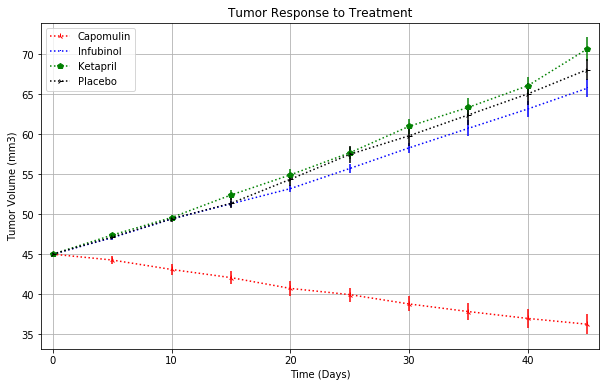

In [6]:
# Generate the Plot (with Error Bars)-------------------------------------------------------

import matplotlib as mpl

drug_list= ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


# create valid markers from mpl.markers
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if
item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])

# valid_markers = mpl.markers.MarkerStyle.filled_markers
markers = np.random.choice(valid_markers, df.shape[1], replace=False)

# generating main plot
colors = ['r', 'b', 'g', 'black']

ax = mdm_df[drug_list].plot(
    kind = 'line',
    yerr = mdm_df2[drug_list],
    title = 'Tumor Response to Treatment',
    figsize = (10,6),
    grid = True,
    xlim = (min(mdm_df.index)-1, max(mdm_df.index)+1),
    linestyle = ':',
    color = colors
)

# generating random markers for each line & adding updated legend
for i, line in enumerate(ax.get_lines()):
    line.set_marker(markers[i])
ax.legend(ax.get_lines(), drug_list, loc='best')

# label Y Axis
ax.set_ylabel('Tumor Volume (mm3)')
ax.set_xlabel('Time (Days)')

# Save the Figure
plt.savefig('Output_Graphs/Tumor Response to Treatment.png')

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
ms_mean_df = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].mean().reset_index()

# Convert to DataFrame
## AlREADY COMPLETED

# Preview DataFrame
ms_mean_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
ms_sem_df = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].sem().reset_index()

# Convert to DataFrame
## AlREADY COMPLETED

# Preview DataFrame
ms_sem_df.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
ms_df = pd.pivot_table(ms_mean_df, index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
ms_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [10]:
# Minor Data Munging to Re-Format the Data Frames
ms_df2 = pd.pivot_table(ms_sem_df, index='Timepoint', columns='Drug', values='Metastatic Sites')

# Preview that Reformatting worked
ms_df2.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


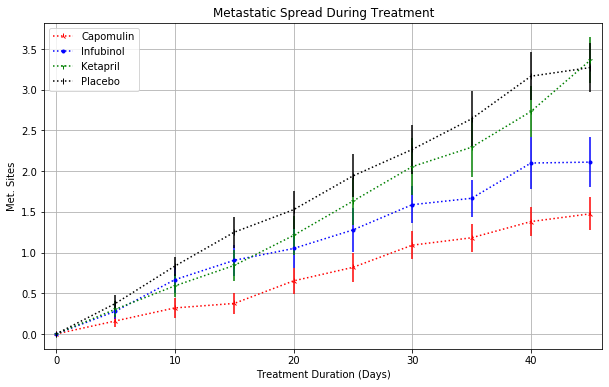

In [73]:
# Generate the Plot (with Error Bars)-------------------------------------------------------

import matplotlib as mpl

drug_list= ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


# create valid markers from mpl.markers
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if
item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])

# valid_markers = mpl.markers.MarkerStyle.filled_markers
markers = np.random.choice(valid_markers, df.shape[1], replace=False)

# generating main plot
colors = ['r', 'b', 'g', 'black']

ax2 = ms_df[drug_list].plot(
    kind = 'line',
    yerr = ms_df2[drug_list],
    title = 'Metastatic Spread During Treatment',
    figsize = (10,6),
    grid = True,
    xlim = (min(ms_df.index)-1, max(ms_df.index)+1),
    linestyle = ':',
    color = colors
)

# generating random markers for each line & adding updated legend
for i, line in enumerate(ax2.get_lines()):
    line.set_marker(markers[i])
ax2.legend(ax2.get_lines(), drug_list, loc='best')

# label Y Axis
ax2.set_ylabel('Met. Sites')
ax2.set_xlabel('Treatment Duration (Days)')

# Save the Figure
plt.savefig('Output_Graphs/Metastatic Spread During Treatment')

# Show the Figure
plt.show()

## Survival Rates

In [33]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
cmg_df = df.groupby(['Drug', 'Timepoint'])['Metastatic Sites'].count().reset_index().rename(columns={
    'Metastatic Sites' : 'Mouse Count'
})

# Convert to DataFrame
## AlREADY COMPLETED

# Preview DataFrame
cmg_df.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [34]:
# Minor Data Munging to Re-Format the Data Frames
cmg_df = pd.pivot_table(cmg_df, index='Timepoint', columns='Drug', values='Mouse Count')

# Preview that Reformatting worked
cmg_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [35]:
cmgp_df = cmg_df

for col in cmg_df.columns:
    cmgp_df[col] = (cmgp_df[col]/cmg_df[col].max())*100

cmgp_df.head()


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0


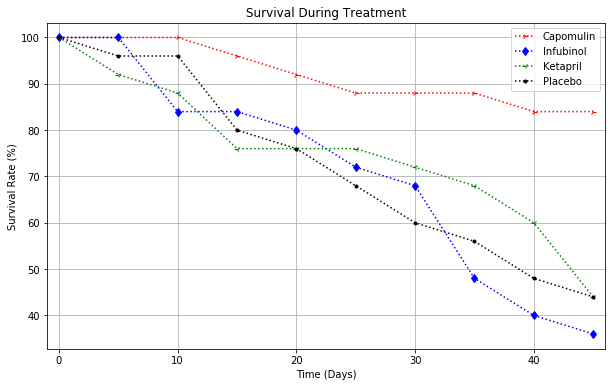

In [71]:
# Generate the Plot (Accounting for percentages)-------------------------------------------------------

import matplotlib as mpl

drug_list = ['Capomulin', 'Infubinol', 'Ketapril', 'Placebo']


# create valid markers from mpl.markers
valid_markers = ([item[0] for item in mpl.markers.MarkerStyle.markers.items() if
item[1] is not 'nothing' and not item[1].startswith('tick') and not item[1].startswith('caret')])

# valid_markers = mpl.markers.MarkerStyle.filled_markers
markers = np.random.choice(valid_markers, df.shape[1], replace=False)

# generating main plot
colors = ['r', 'b', 'g', 'black']

ax3 = cmgp_df[drug_list].plot(
    kind = 'line',
    title = 'Survival During Treatment',
    figsize = (10,6),
    grid = True,
    xlim = (min(cmgp_df.index)-1, max(cmgp_df.index)+1),
    linestyle = ':',
    color = colors
)

# generating random markers for each line & adding updated legend
for i, line in enumerate(ax3.get_lines()):
    line.set_marker(markers[i])
ax3.legend(ax3.get_lines(), drug_list, loc='best')

# label Y Axis
ax3.set_ylabel('Survival Rate (%)')
ax3.set_xlabel('Time (Days)')

# Save the Figure
plt.savefig('Output_Graphs/Survival During Treatment')

# Show the Figure
plt.show()

## Summary Bar Graph

In [64]:
# Calculate the percent changes for each drug
srd_df = ( ( mdm_df.iloc[mdm_df.index == mdm_df.index[-1]] - mdm_df.iloc[0] ) / mdm_df.iloc[0] ) * 100
srd_df = srd.reset_index(drop=True)

# Display the data to confirm
srd_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,-19.475303,42.516492,46.123472,57.028795,53.923347,51.29796,47.241175,-22.3209,52.085134,46.579751


In [13]:
# Provided Solution

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [69]:
# Provided Solution
# Store all Relevant Percent Changes into a Tuple
srd_tup = tuple(srd_df.iloc[0])

# Splice the data between passing and failing drugs
# WHAT QUALIFIES AS A PASSING AND FAILING DURG??????????



# # Orient widths. Add labels, tick marks, etc. 
# ax4.set_ylabel('% Tumor Volume Change')
# ax4.set_xlabel('Drug')

# Use functions to label the percentages of changes


# Call functions to implement the function calls


# # Save the Figure
# plt.savefig('Output_Graphs/Tumor Change Over 45 Day Treatment')

# # Show the Figure
# fig.show()

(-19.475302667894173,
 42.516491855897414,
 46.12347172785184,
 57.028794686606076,
 53.92334713476923,
 51.29796048315153,
 47.24117486320634,
 -22.320900462766673,
 52.08513428789896,
 46.57975086509525)

![Metastatic Spread During Treatment](../Images/change.png)